# Main Jupyter Notebook

## Data preparation

In [1]:
from importnb import imports
with imports("ipynb"):
    from common.functions import (
        load_dataset,
        load_parameters,
        clean_up_dataset,
        print_feature_outliers,
        remove_outliers,
        generate_numerical_eda_visualization,
        generate_numerical_heatmap,
        generate_numerical_categorical_heatmap,
        generate_categorical_count_visualization,
        generate_numerical_vs_categorical_eda_visualization,
        generate_time_series_visualization,
        generate_linear_regression
    )

In [2]:
parameters = load_parameters(".")
# print(parameters)

In [3]:
DatasetRaw = load_dataset(parameters['load_dataset_parameters'])
DatasetRaw.info()
DatasetRaw.head(5)
# DatasetRaw.to_csv("mixed_remaining_lease_type.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190045 entries, 0 to 190044
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                190045 non-null  datetime64[ns]
 1   town                 190045 non-null  category      
 2   flat_type            190045 non-null  category      
 3   block                190045 non-null  string        
 4   street_name          190045 non-null  string        
 5   storey_range         190045 non-null  category      
 6   floor_area_sqm       190045 non-null  int64         
 7   flat_model           190045 non-null  category      
 8   lease_commence_date  190045 non-null  int64         
 9   remaining_lease      190045 non-null  string        
 10  resale_price         190045 non-null  int64         
dtypes: category(4), datetime64[ns](1), int64(3), string(3)
memory usage: 10.9 MB


month        town flat_type block        street_name storey_range   
0 2017-01-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12  \
1 2017-01-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2 2017-01-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3 2017-01-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4 2017-01-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease   
0              44        Improved                 1979  61 years 04 months  \
1              67  New Generation                 1978  60 years 07 months   
2              67  New Generation                 1980  62 years 05 months   
3              68  New Generation                 1980   62 years 01 month   
4              67  New Generation                 1980  62 years 05 months   

   resale_price  
0        232000  
1        250000  
2        262000  
3        265000  
4        265000

## Data Cleanup

In [4]:
CleanUpDataset = clean_up_dataset(DatasetRaw, parameters['cleanup_parameters'])
CleanUpDataset.info()
CleanUpDataset.head(5)

Add new column action= 0:resale_price
Add new column action= 1:floor_area_sqm
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190045 entries, 0 to 190044
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   month            190045 non-null  datetime64[ns]
 1   town             190045 non-null  category      
 2   flat_type        190045 non-null  category      
 3   storey_range     190045 non-null  category      
 4   floor_area_sqm   190045 non-null  int64         
 5   flat_model       190045 non-null  category      
 6   remaining_lease  190045 non-null  int64         
 7   resale_price     190045 non-null  int64         
 8   price_per_sqm    190045 non-null  int64         
dtypes: category(4), datetime64[ns](1), int64(4)
memory usage: 8.0 MB


month        town flat_type storey_range  floor_area_sqm   
0 2017-01-01  ANG MO KIO    2 ROOM     10 TO 12              44  \
1 2017-01-01  ANG MO KIO    3 ROOM     01 TO 03              67   
2 2017-01-01  ANG MO KIO    3 ROOM     01 TO 03              67   
3 2017-01-01  ANG MO KIO    3 ROOM     04 TO 06              68   
4 2017-01-01  ANG MO KIO    3 ROOM     01 TO 03              67   

       flat_model  remaining_lease  resale_price  price_per_sqm  
0        Improved               61        232000           5272  
1  New Generation               60        250000           3731  
2  New Generation               62        262000           3910  
3  New Generation               62        265000           3897  
4  New Generation               62        265000           3955

In [5]:
print_feature_outliers(CleanUpDataset)

[floor_area_sqm] total outliers: 1130
[remaining_lease] total outliers: 0
[resale_price] total outliers: 5145
[price_per_sqm] total outliers: 10041


In [6]:
RemovedOutlierDataset = remove_outliers(CleanUpDataset)
RemovedOutlierDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177279 entries, 0 to 177278
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   month            177279 non-null  datetime64[ns]
 1   town             177279 non-null  category      
 2   flat_type        177279 non-null  category      
 3   storey_range     177279 non-null  category      
 4   floor_area_sqm   177279 non-null  int64         
 5   flat_model       177279 non-null  category      
 6   remaining_lease  177279 non-null  int64         
 7   resale_price     177279 non-null  int64         
 8   price_per_sqm    177279 non-null  int64         
dtypes: category(4), datetime64[ns](1), int64(4)
memory usage: 7.4 MB


## Correlation of dataframe features

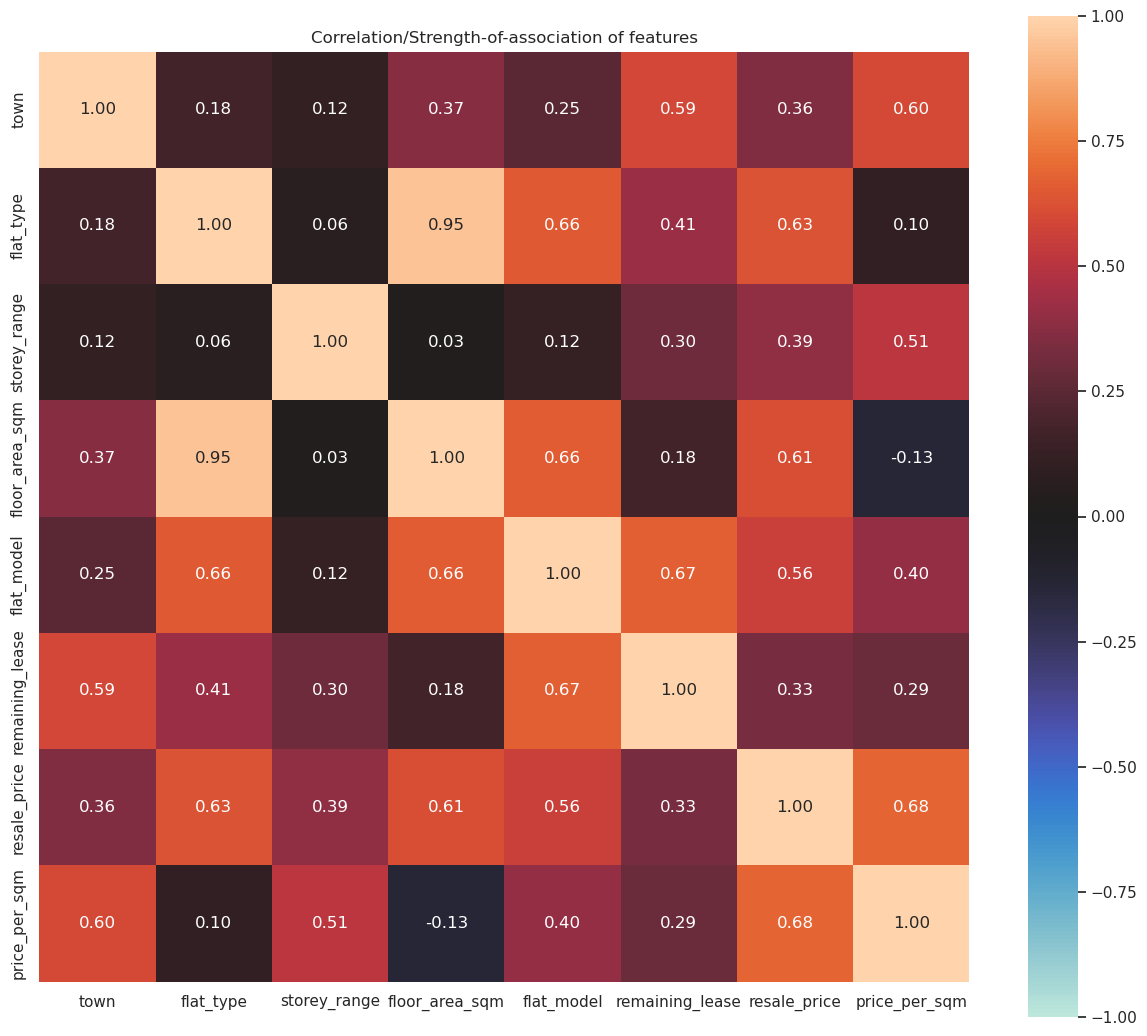

In [7]:
generate_numerical_categorical_heatmap(CleanUpDataset)

In [8]:
# generate_numerical_categorical_heatmap(RemovedOutlierDataset)

In [9]:
# generate_numerical_heatmap(RemovedOutlierDataset, "Numerical Heatmap")

## Simple Exploratory Data Analysis

In [10]:
# CleanUpDataset.describe()

month  floor_area_sqm  remaining_lease   
count                         190045   190045.000000    190045.000000  \
mean   2019-07-02 18:41:38.755557888       97.417138        74.214481   
min              2015-01-01 00:00:00       31.000000        42.000000   
25%              2017-07-01 00:00:00       82.000000        64.000000   
50%              2019-09-01 00:00:00       94.000000        74.000000   
75%              2021-08-01 00:00:00      112.000000        85.000000   
max              2023-05-01 00:00:00      280.000000        97.000000   
std                              NaN       24.090047        13.210839   

       resale_price  price_per_sqm  
count  1.900450e+05  190045.000000  
mean   4.730579e+05    4899.498898  
min    1.400000e+05    2089.000000  
25%    3.550000e+05    4000.000000  
50%    4.400000e+05    4602.000000  
75%    5.580000e+05    5434.000000  
max    1.418000e+06   14736.000000  
std    1.621003e+05    1327.422132

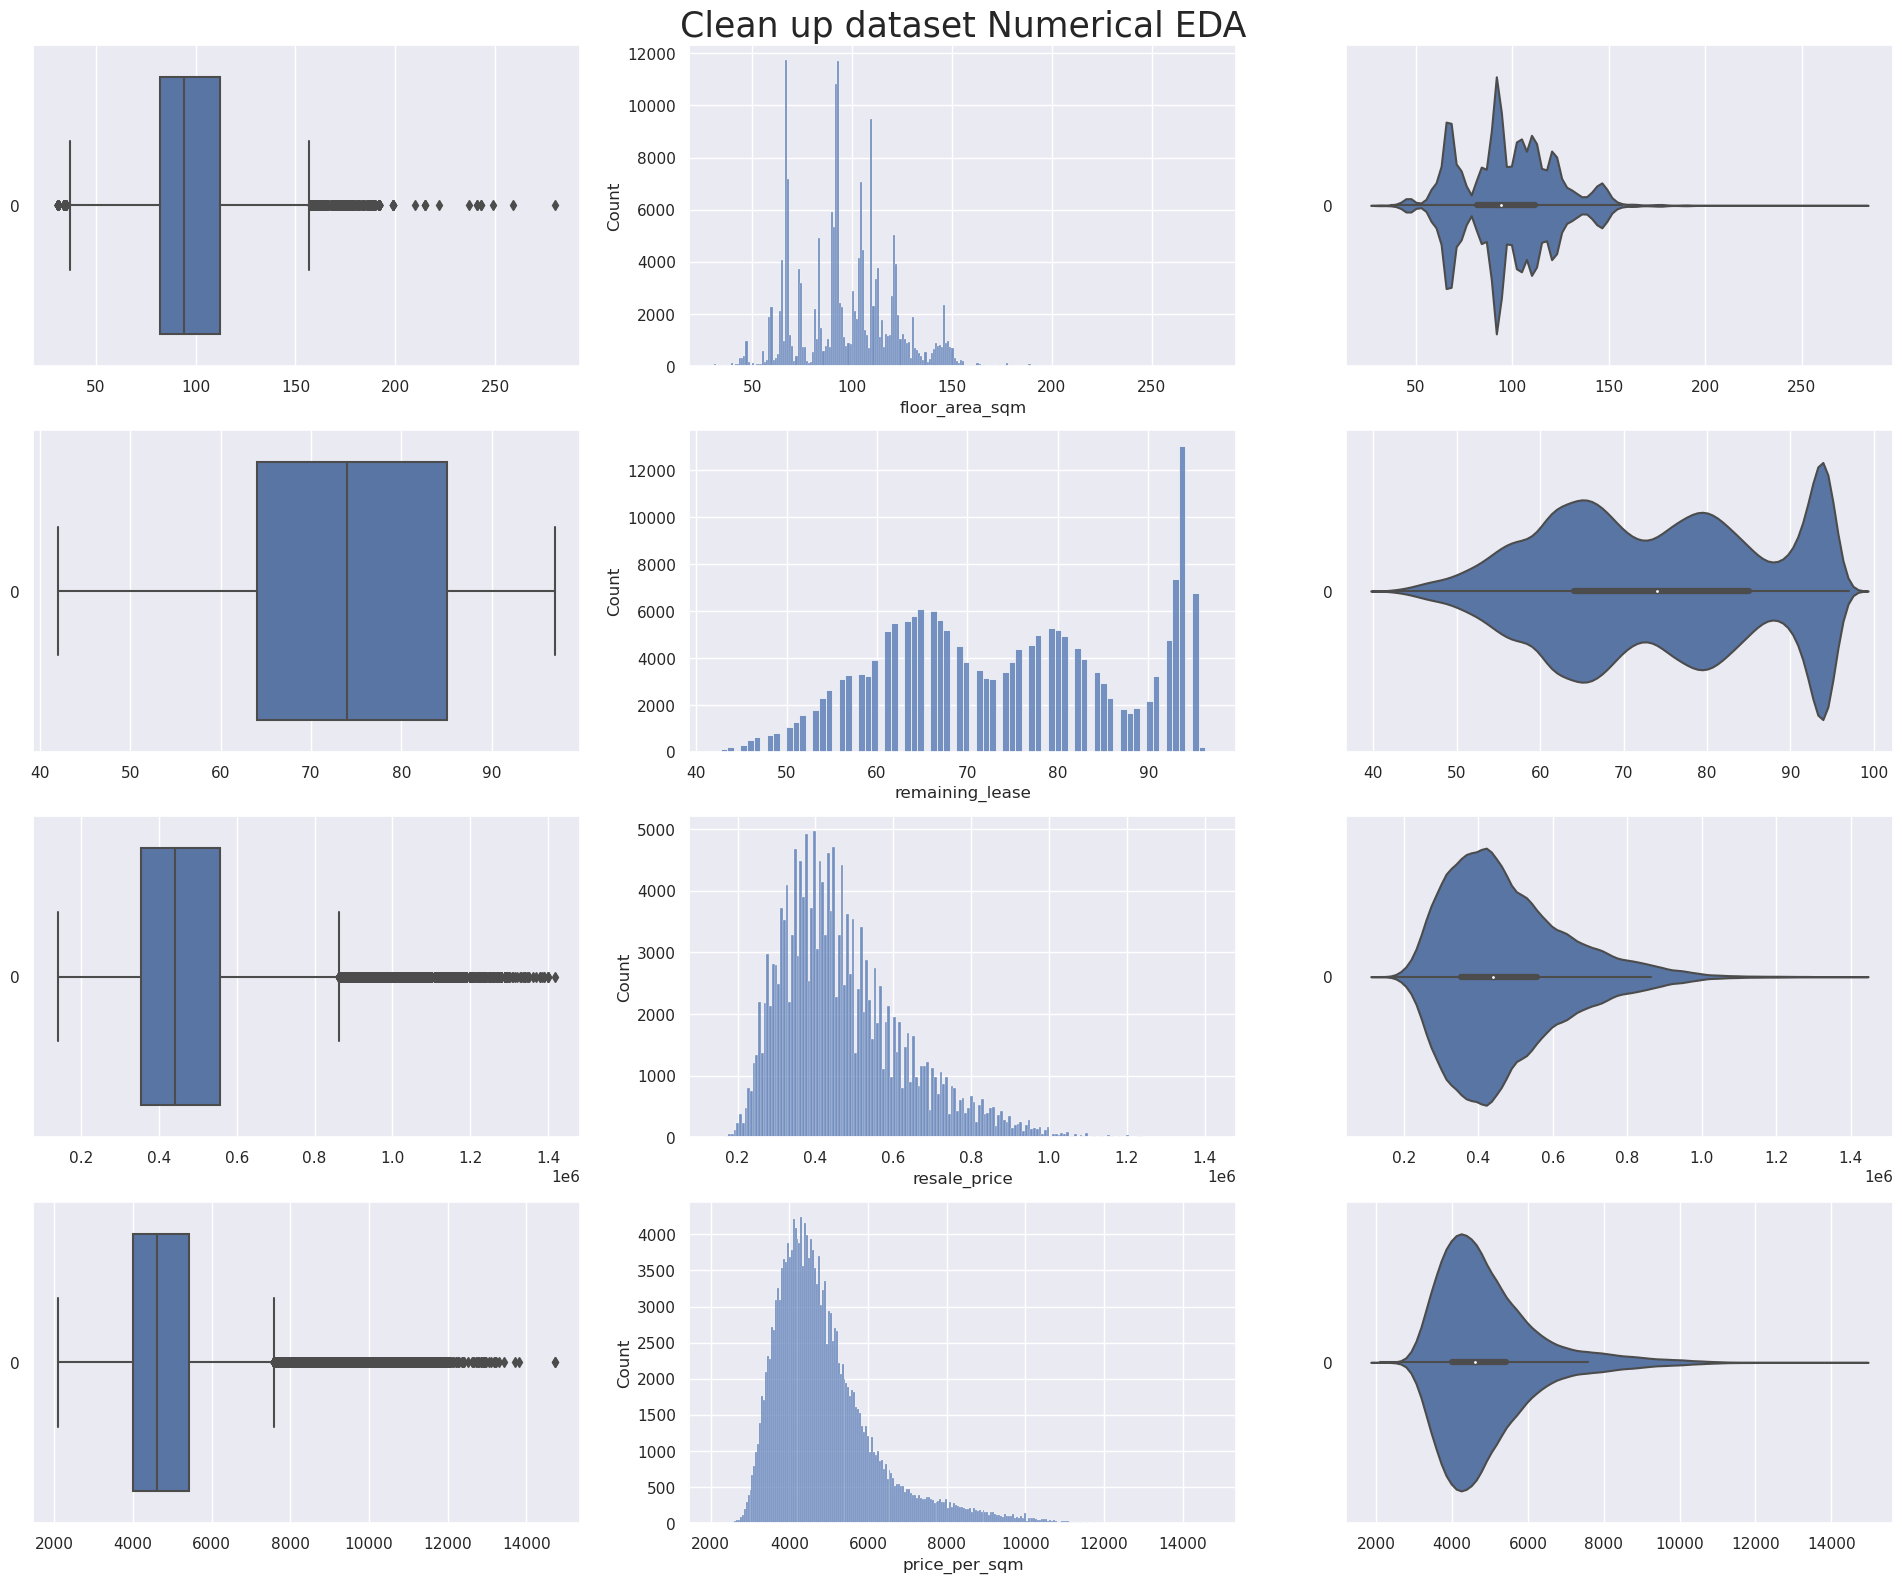

In [11]:
# generate_numerical_eda_visualization(CleanUpDataset, "Clean up dataset Numerical EDA")

In [12]:
# generate_numerical_eda_visualization(RemovedOutlierDataset, "Removed Outlier dataset Numerical EDA")

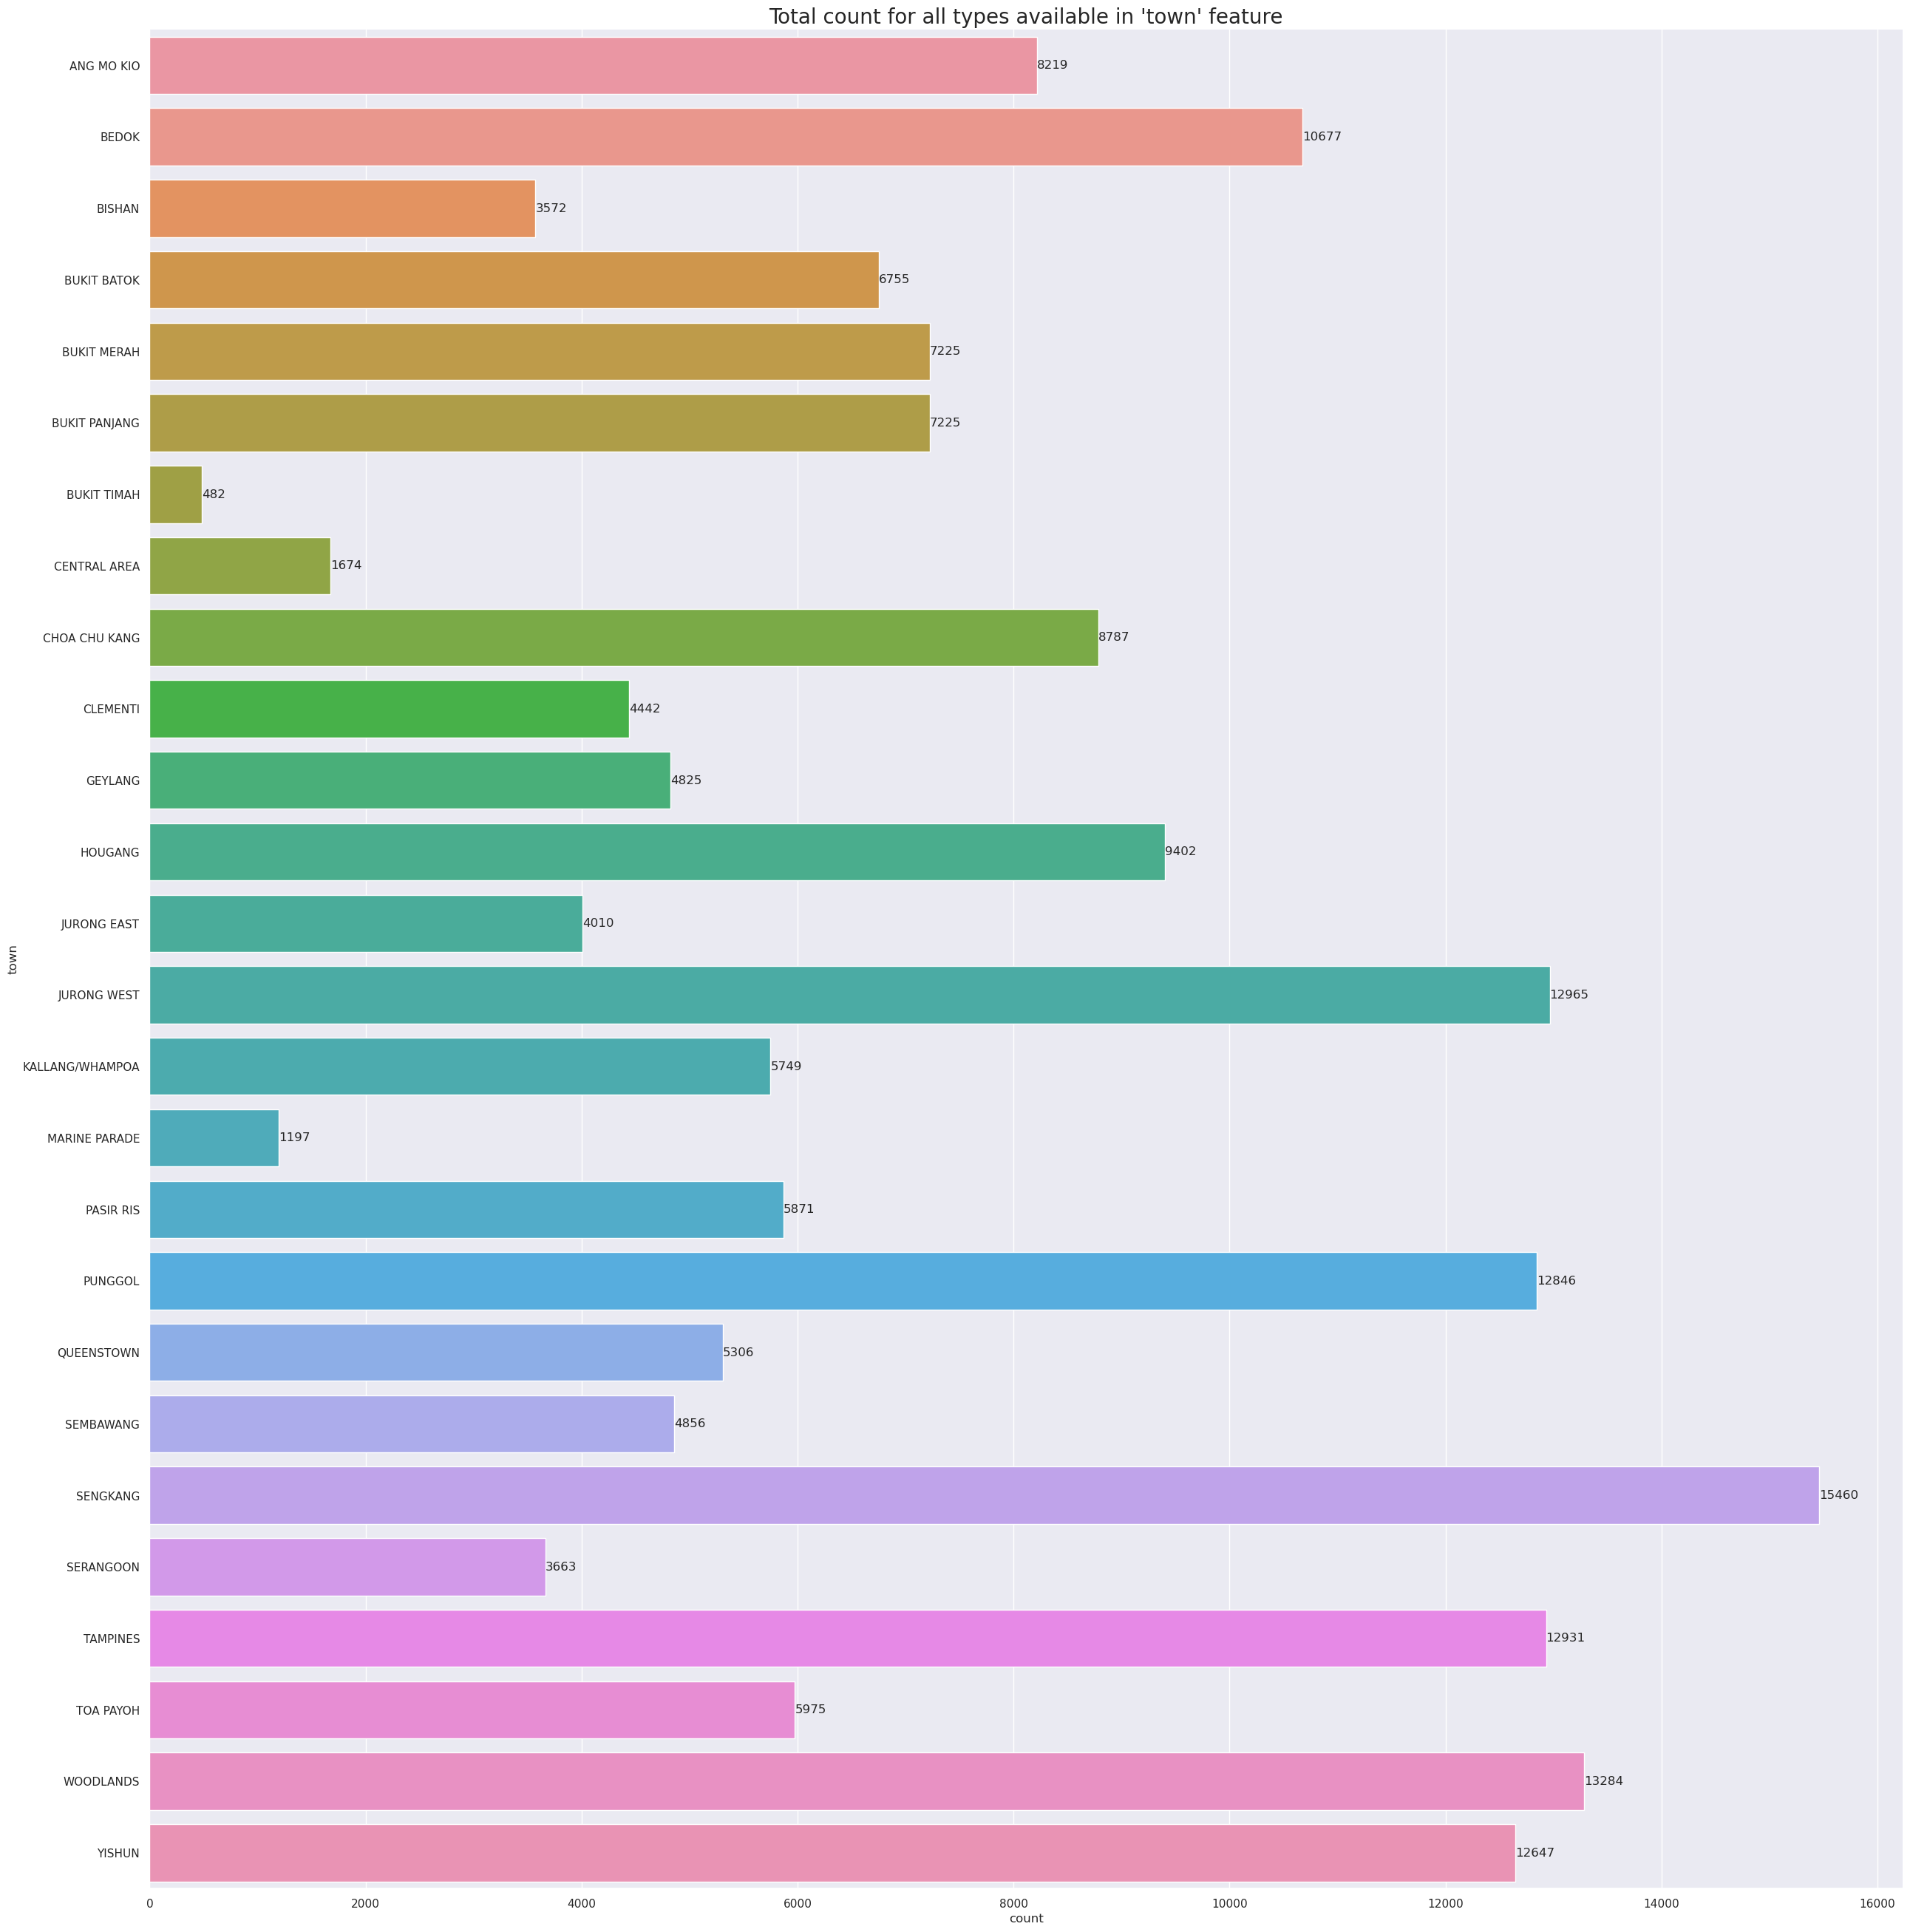

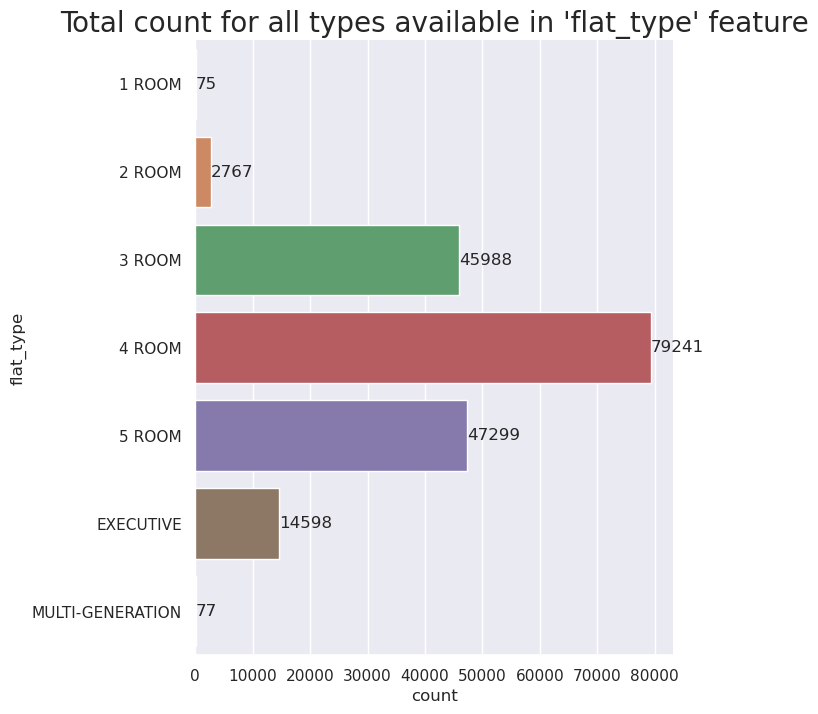

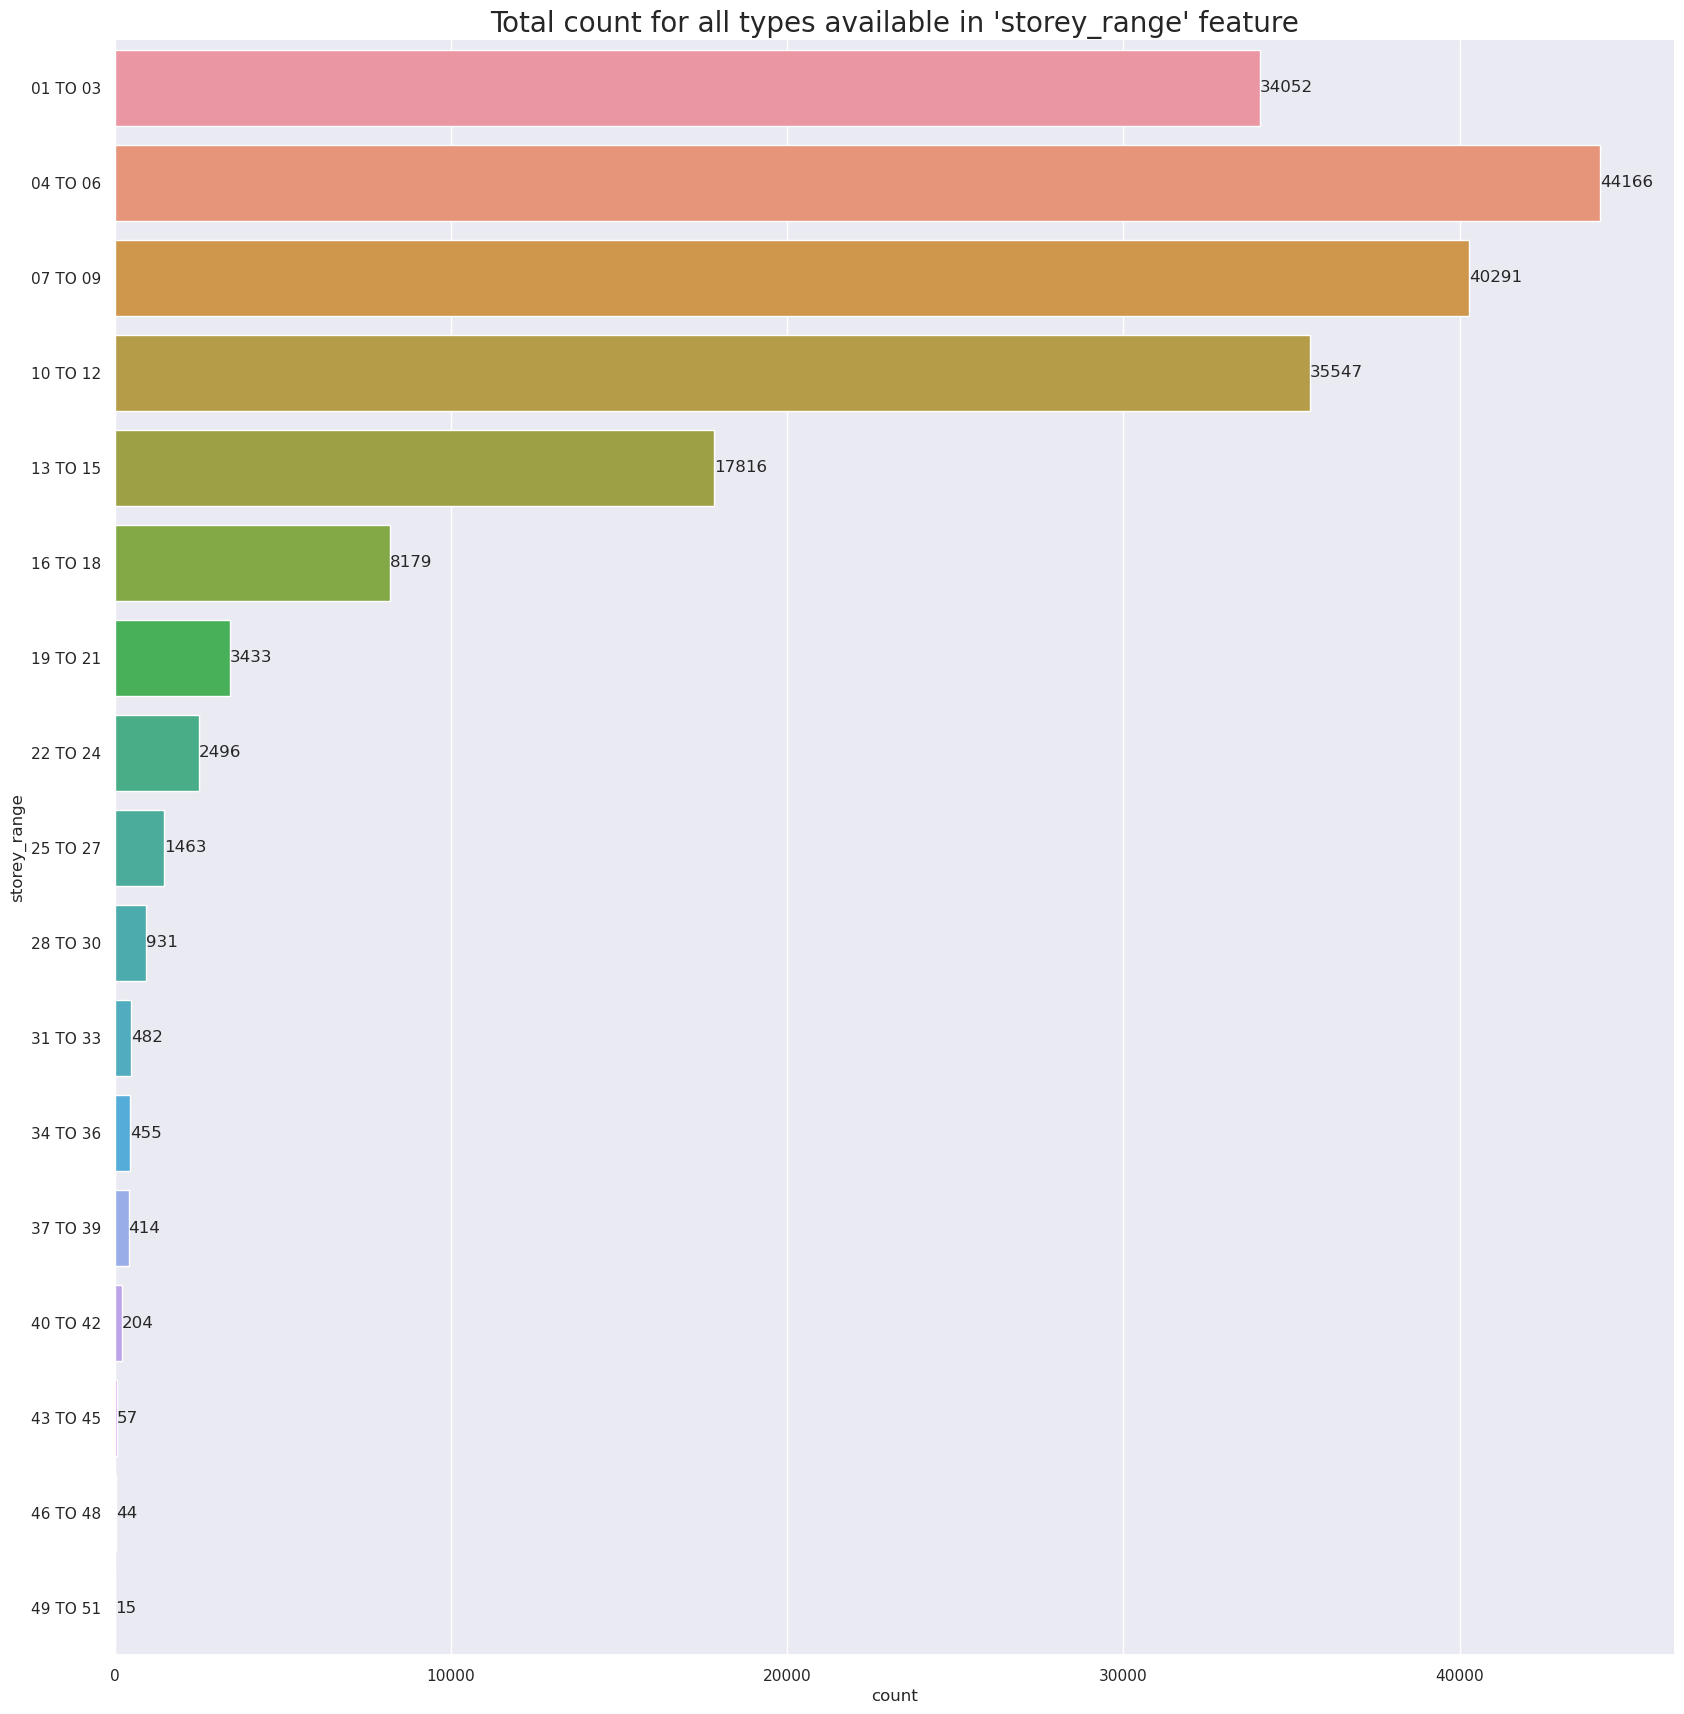

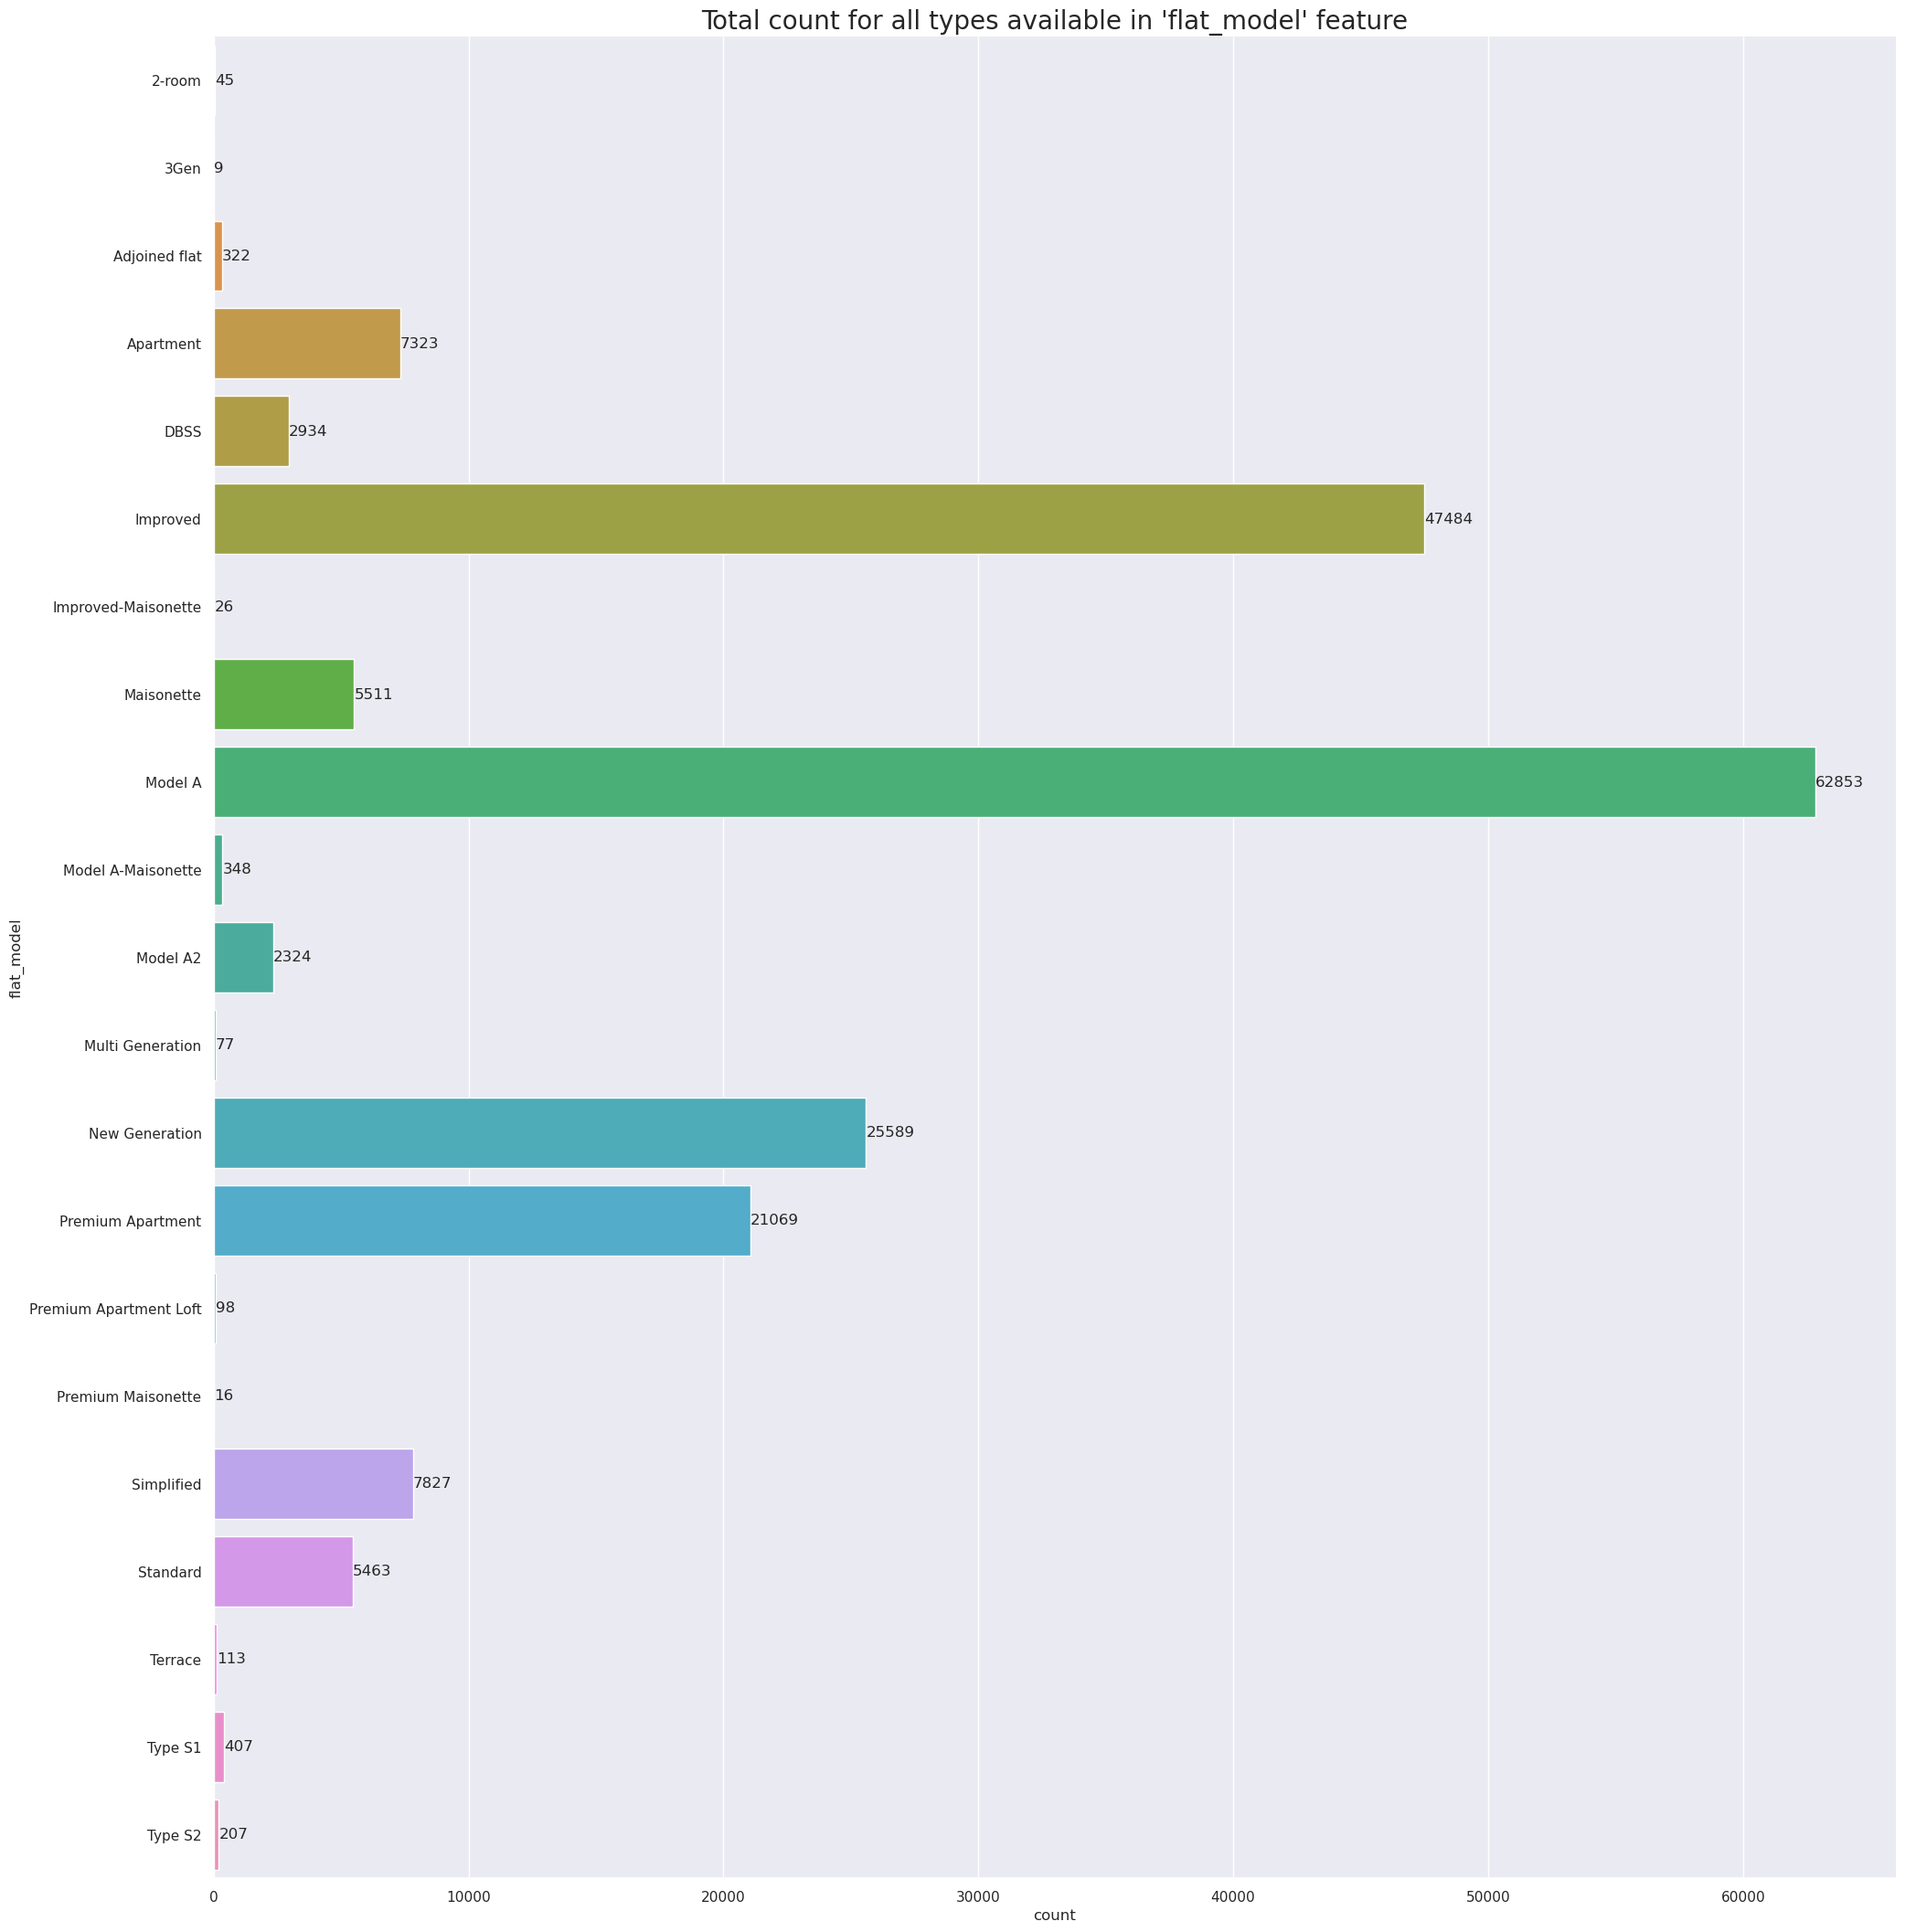

In [13]:
# generate_categorical_count_visualization(CleanUpDataset, parameters['categorical_count_visualization_parameters'])
# generate_categorical_count_visualization(RemovedOutlierDataset, parameters['categorical_count_visualization_parameters'])

/home/uie41932/NTU/year1/semS/cc0002/common/functions.ipynb:465: UserWarning: The figure layout has changed to tight
  figure.tight_layout(pad=10.0)


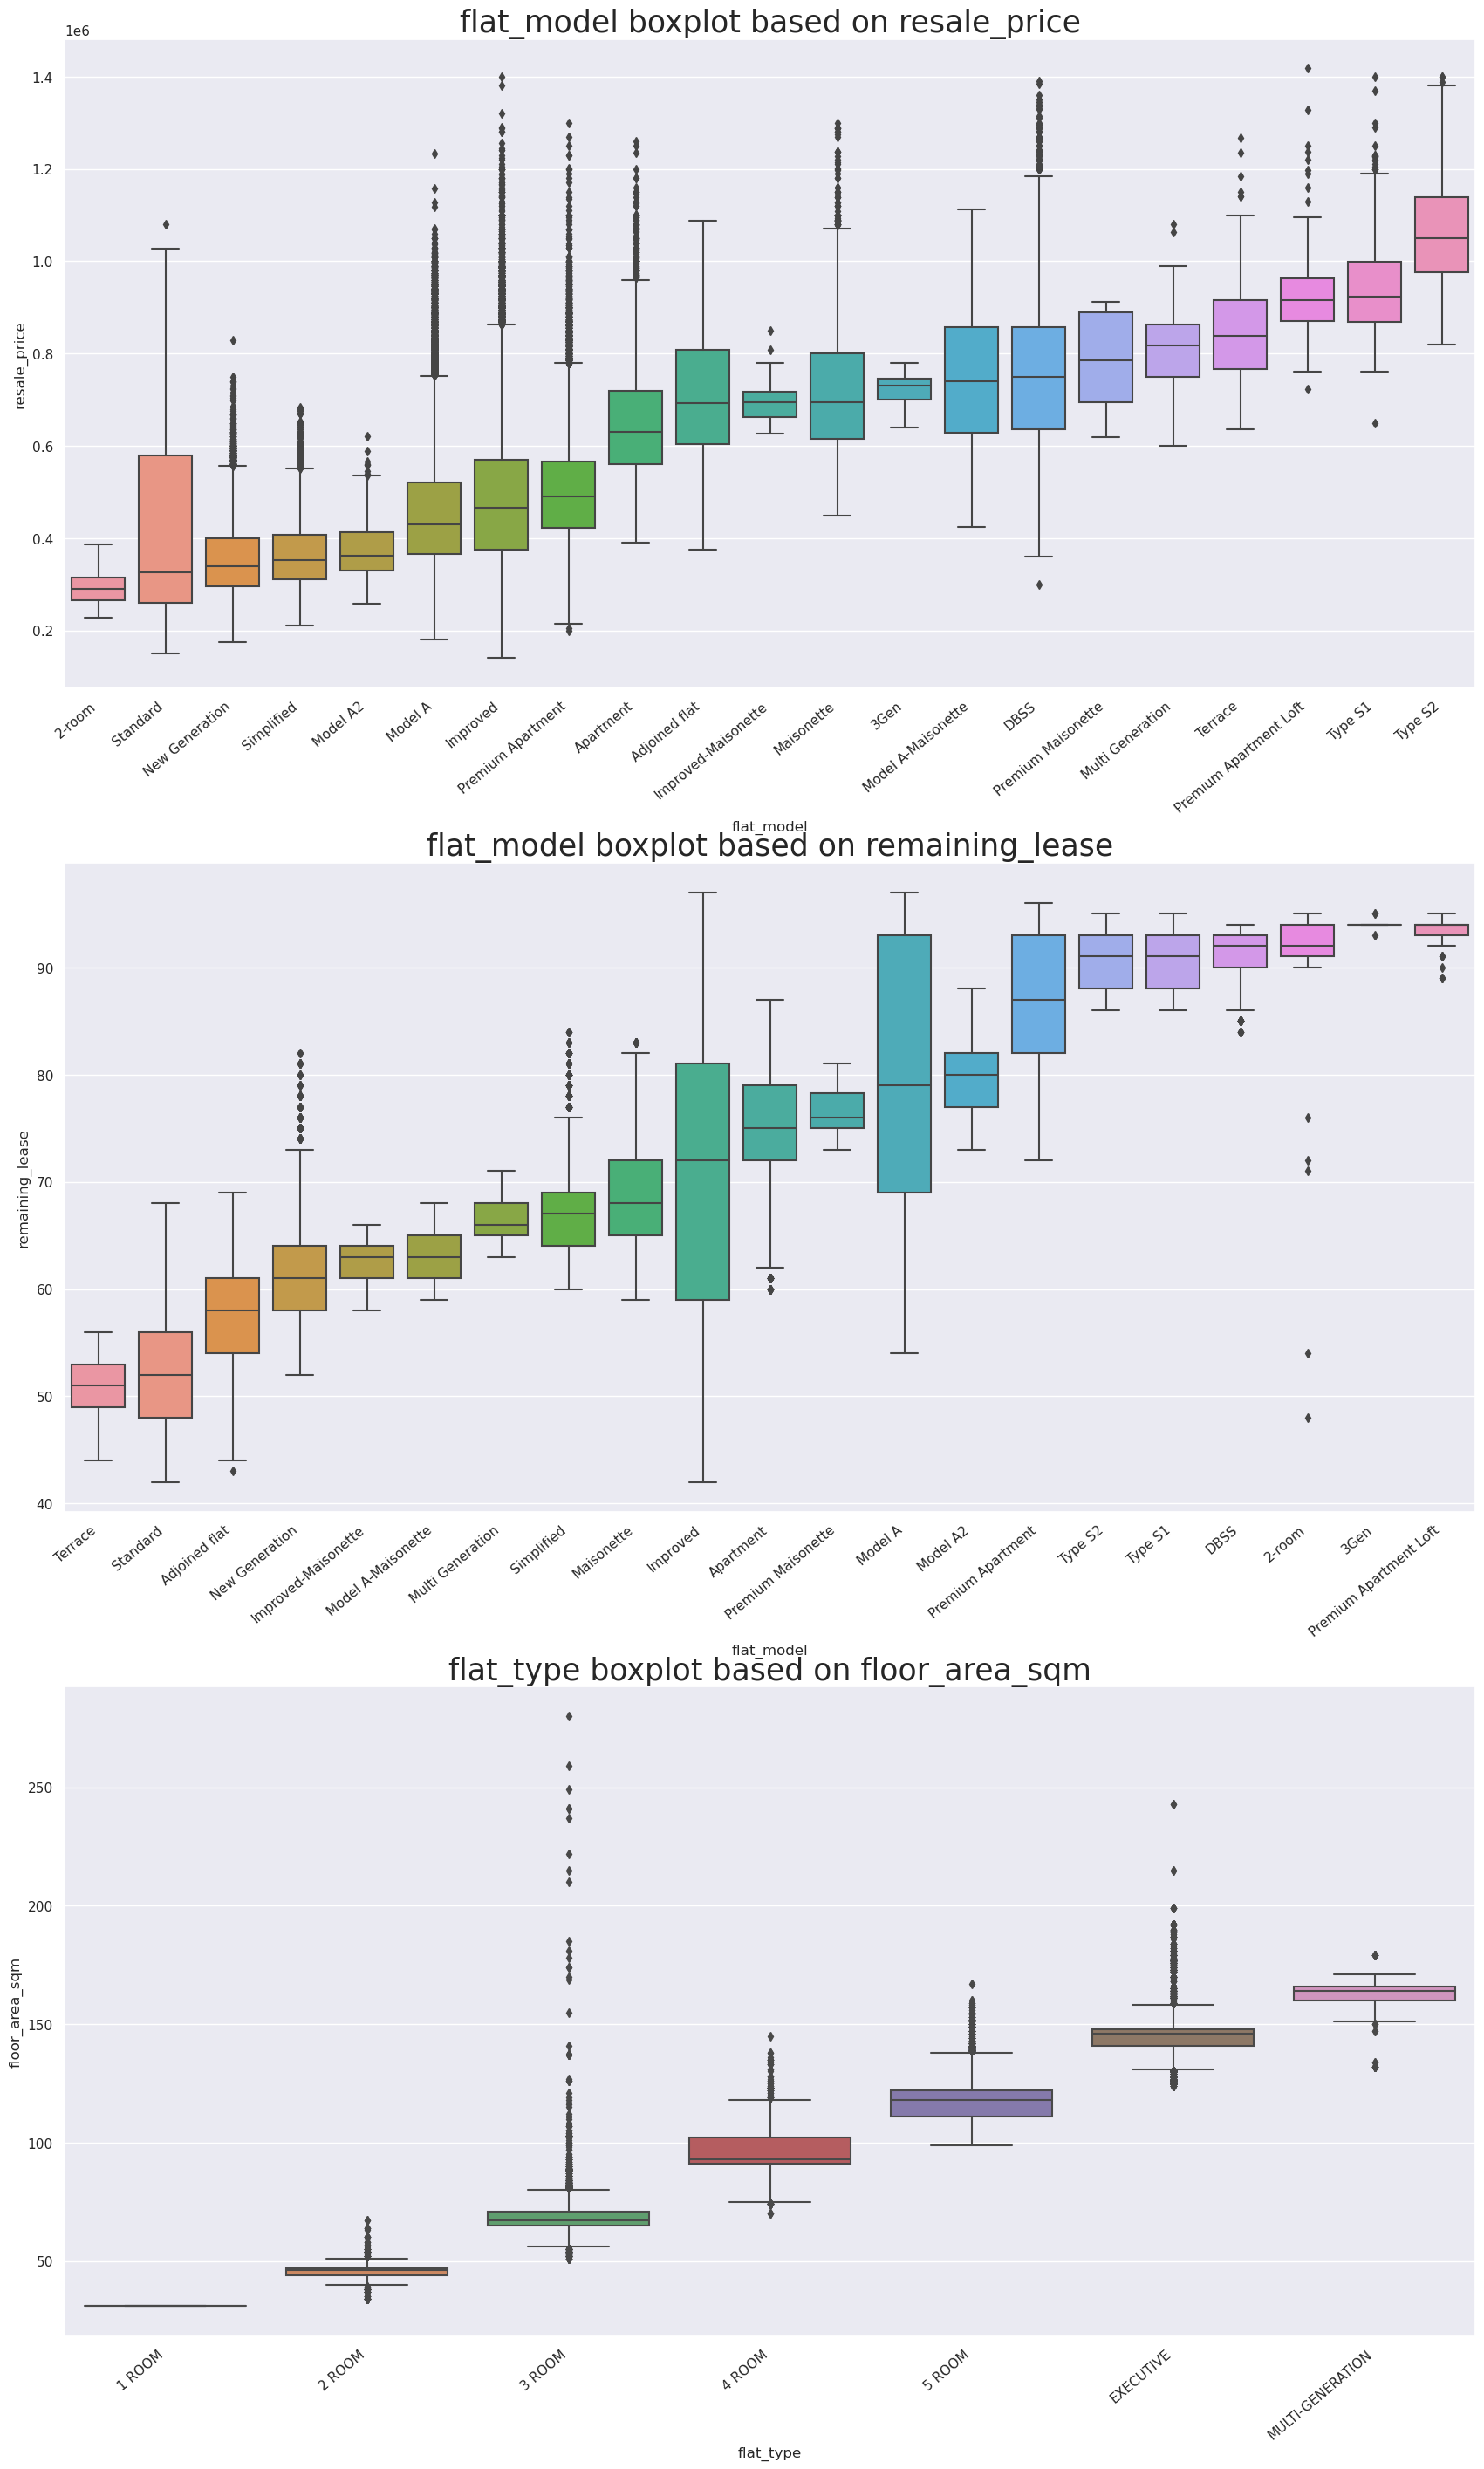

In [14]:
# generate_numerical_vs_categorical_eda_visualization(
#     CleanUpDataset, 
#     parameters['numerical_vs_categorical_eda_visualization_parameters'], 
#     '[UNION outliers removed] num_subscriber VS category'
# )
# generate_numerical_vs_categorical_eda_visualization(
#     RemovedOutlierDataset, 
#     parameters['numerical_vs_categorical_eda_visualization_parameters'], 
#     '[UNION outliers removed] num_subscriber VS category'
# )

## Time series graph according to town based on value observed 

/home/uie41932/miniconda3/envs/cc0002/lib/python3.10/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/home/uie41932/miniconda3/envs/cc0002/lib/python3.10/site-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
posx and posy should be finite values


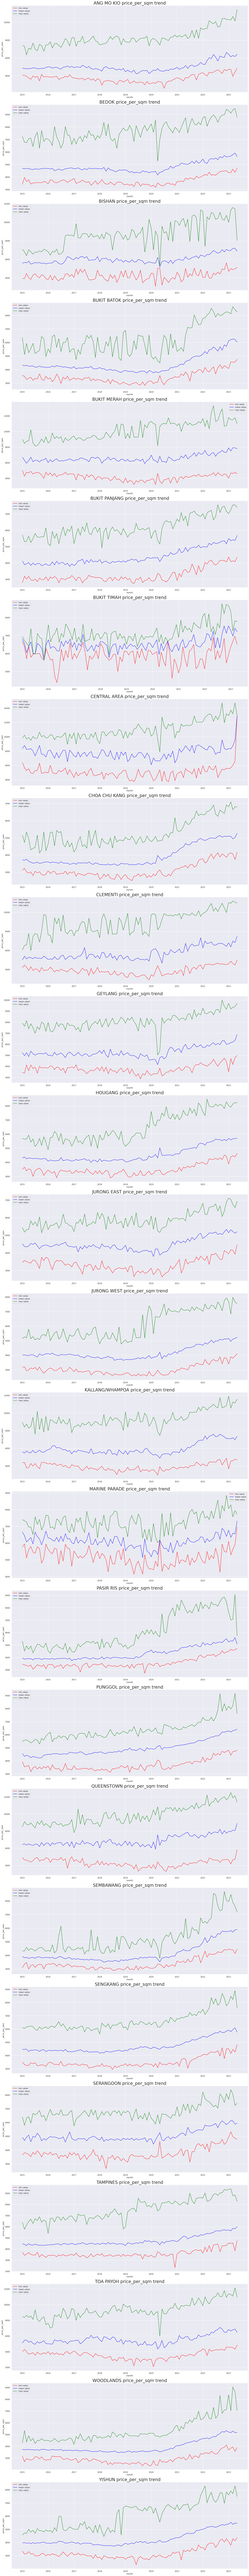

posx and posy should be finite values
posx and posy should be finite values


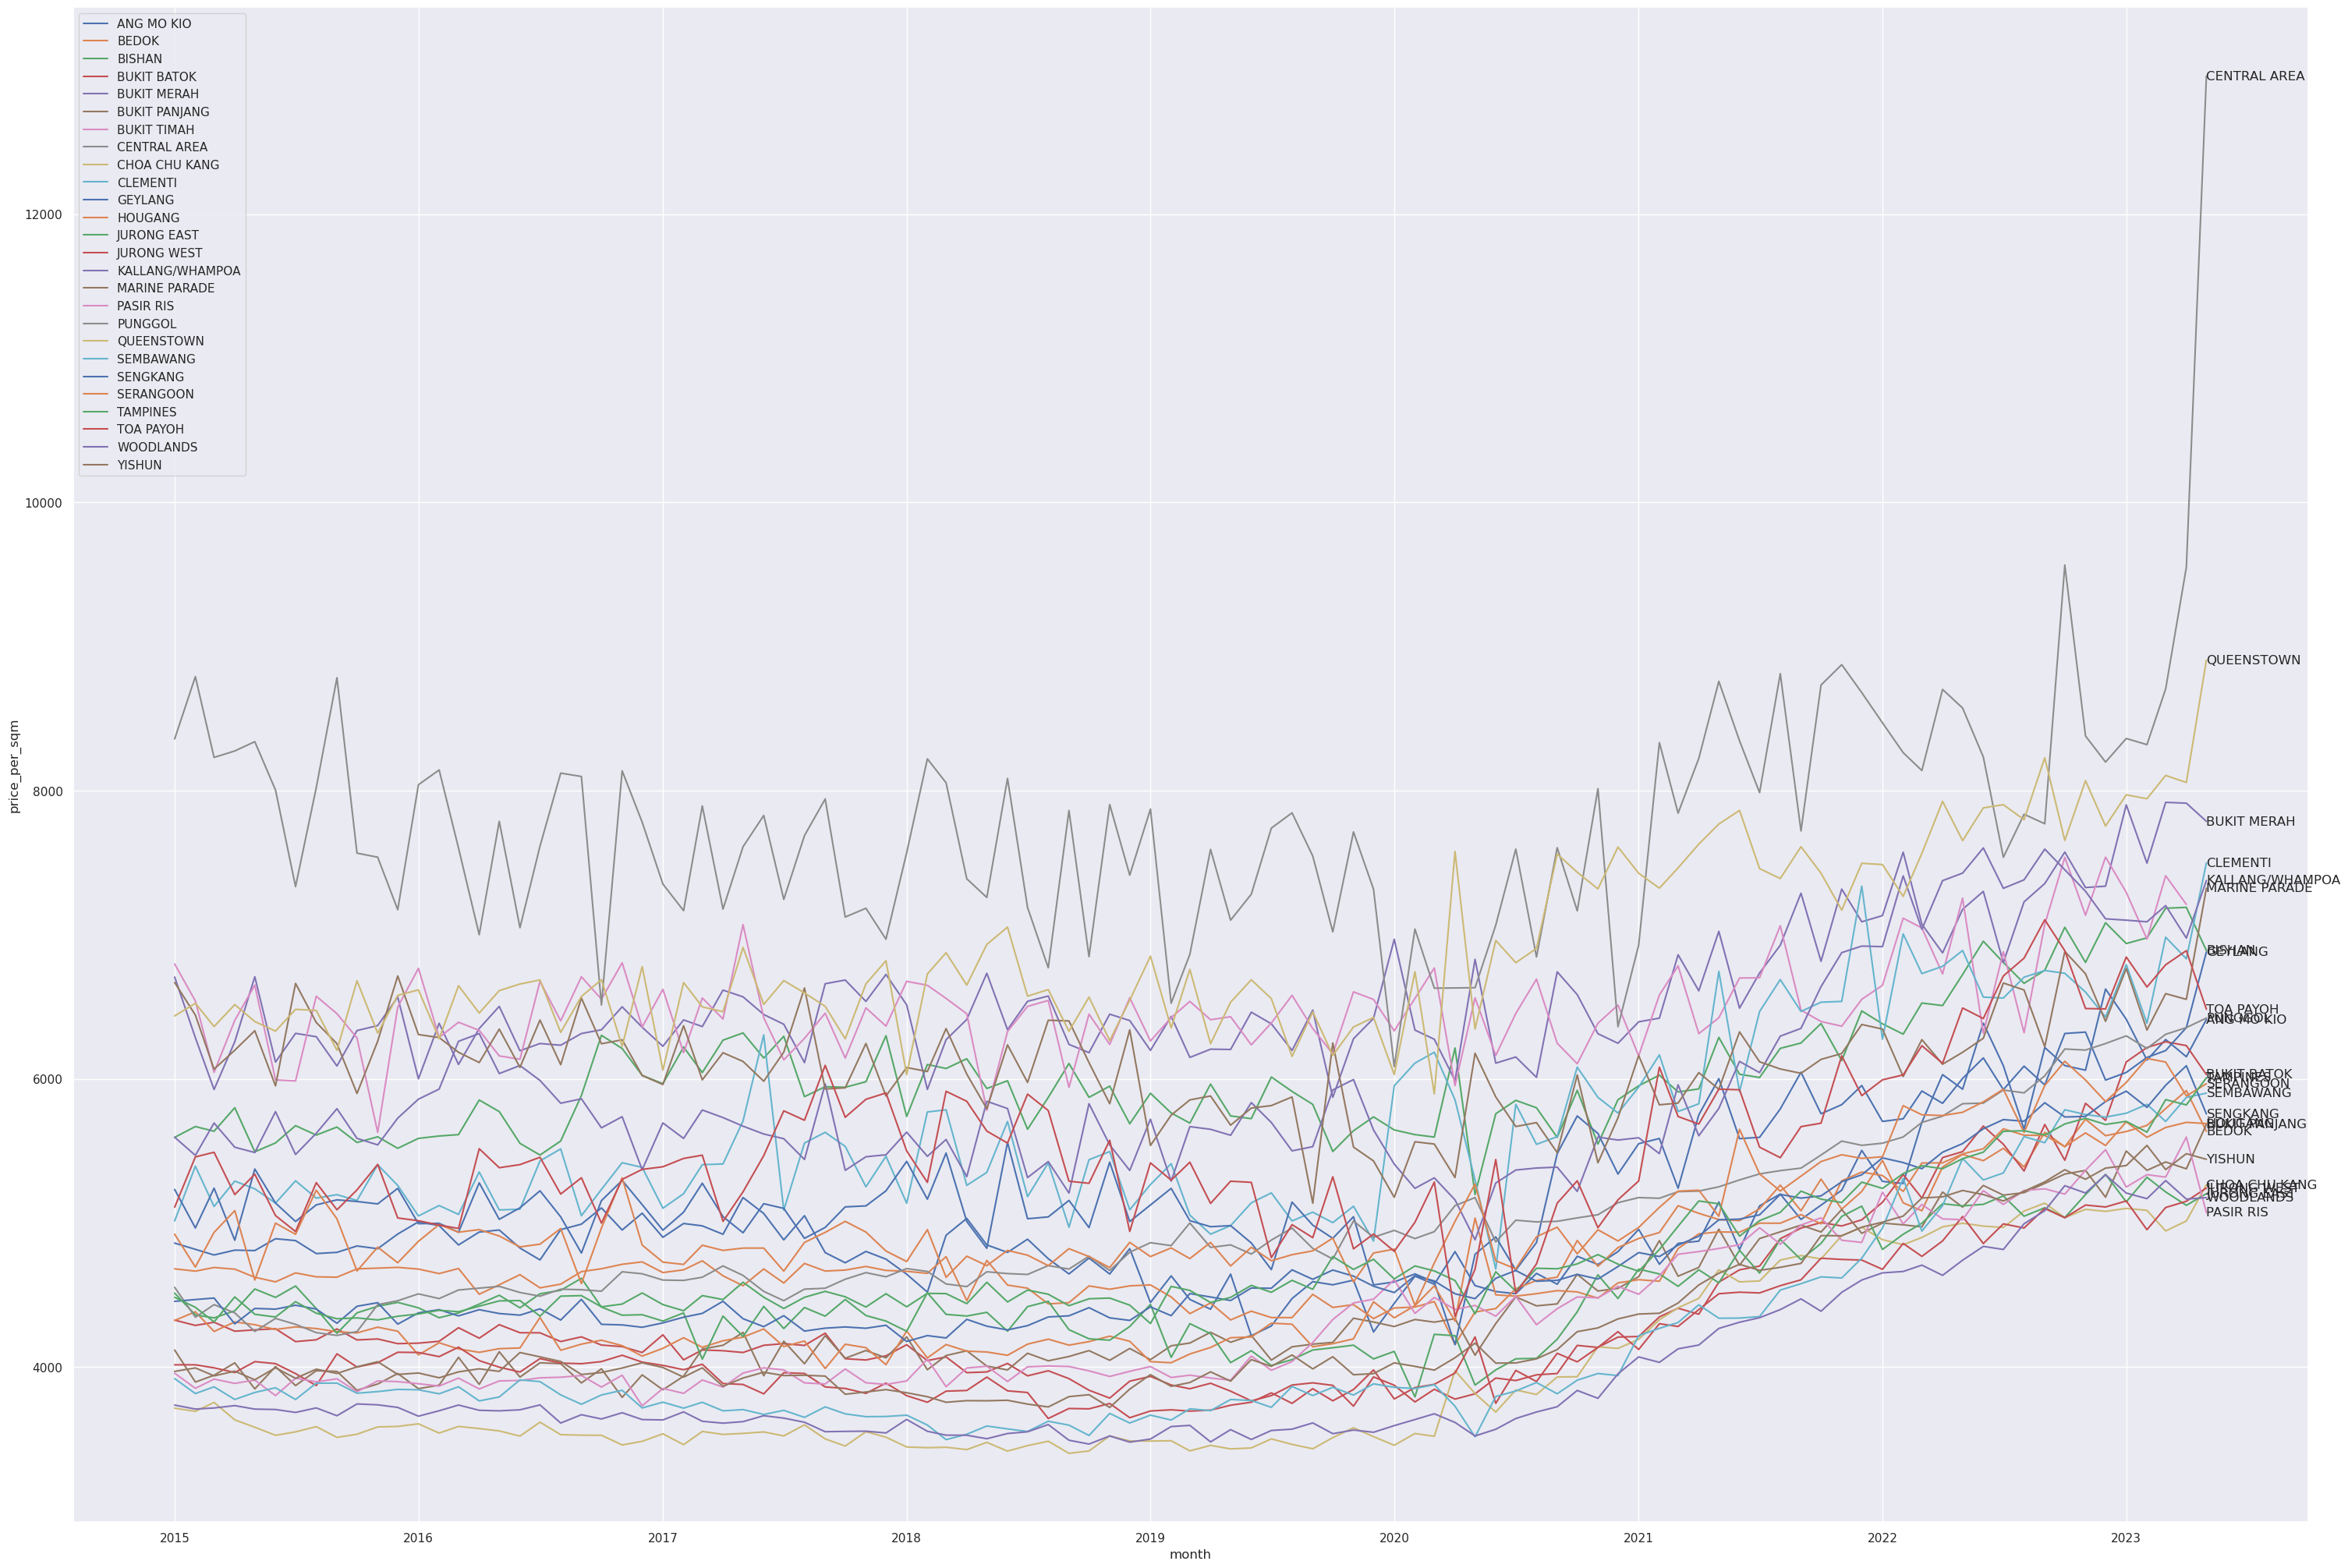

In [15]:
# generate_time_series_visualization(CleanUpDataset, parameters['time_series_parameters'])
# generate_time_series_visualization(RemovedOutlierDataset, parameters['time_series_parameters'])

## Linear regression

In [16]:
generate_linear_regression(CleanUpDataset, parameters['linear_regression_parameters'])

parameters: [{'response': 'resale_price', 'predictors': ['floor_area_sqm', 'price_per_sqm', 'flat_type']}]
response: resale_price, predictor_features: ['floor_area_sqm', 'price_per_sqm', 'flat_type']
